首先，我们需要说明的是GAN是非监督式学习中一种非常powerful的工具...

想想我们的生成器，如RNN、autoencoder等都是基于有监督的学习，而GAN是不是有监督的呢，从某种意义上也应该是的... 对于生成器，是非监督，只是生成器是依赖于判别器来生成，而不是标记样本，这种变化，使得生成的样例能够多样化，而不是固定的...

我们希望有一个分布得到的隐变量的每个维度能够表示某个对象的某个属性特征...

GAN的工作过程，就如同生物的进化...

对于生成器来说，判别器只是攀登高梯的工具而且，是一种利用关系... 两者之间但又存在着某种羁绊，互相又离不开对方... 正所谓相生相伴吧...

生成器是输入一个高维向量，输出一个对象，比如图像，文本等...

判别器是输入一个对象，输出一个scaler，这个scaler的大小代表着之前产生对象的离真实程度...

实际在coding的时候该如何实现GAN呢？

* 实际会把生成器和判别器的网络连接起来当成一个大的网络；
* 固定住判别器的后面几层的参数；
* 训练生成器的参数，使得目标输出的scaler值越大越好；
* 中间会有一个隐层的维度很大，如果是图片的话，那这个向量的维度就是像素大小；
* 对于为什么需要固定住判别器的后面几层，如果不固定住，神经网络会直接训练使得最后几层的权重参数变得很大，来满足目标输出值越大越好的要求，前面的参数就不会被更新，那这个时候生成器的能力还是很弱，并不满足期望。

生成器和判别器的算法步骤：

* 初始化判别器D参数$\theta_d$和生成器G参数$\theta_g$
* 生成器D：
    * 从数据库中sample出m个样本$\{x^1, x^2, \cdots, x^m\}$
    * 再随机从一个分布中（均匀分布，高斯分布等）samples出m个噪声数据$\{z^1, z^2, \cdots, z^m\}$
    * 使用生成器生成数据$\{\tilde{x}^1, \tilde{x}^2, \cdots, \tilde{x}^m\}$，$\tilde{x}^i = G(z^i)$，其实就是生成负例
    * 更新判别式参数$\theta_d$使得下式最大化：
    $$\tilde{V} = \frac{1}{m}\sum_{i=1}^m\log D(x^i) + \frac{1}{m}\sum_{i=1}^m \log \bigr(1-D(\tilde{x}^i)\bigr)$$
    $$\theta_d \gets \theta_d + \eta \nabla \tilde{V}(\theta_d)$$
    >说明：这里使用的梯度上升，因需要最大化判别式输出scaler，另外对于判别式来说需要时刻判定生成器输出的scaler为最小化，其实也是挺打击的，一直得不到认可！
* 生成器G：
    * 随机从一个分布中sample出m个样本$\{z^1, z^2, \cdots, z^m\}$，不需要与判别式相同；
    * 更新生成器参数$\theta_g$使得下式最大化：
    $$\tilde{V} = \frac{1}{m}\sum_{i=1}^m\log \left(D\bigr(G(z^i)\bigr)\right)$$
    $$\theta_g \gets \theta_g - \eta \nabla \tilde{V}(\theta_g)$$
    >说明：生成器的任务就是最大化输出这个scaler值，可以使用binary输出，或回归。而判别器就是最大化认出真实样例，最小化负样例，从某种程度上来说就是一个二分类问题。

GAN也属于结构化学习中的一种，输出是一个vector，传统的机器学习输出maybe是一个categorical，或者是scaler，而如果说输出要求是一个vector，matrix，picture，tree等...

如果要让机器实现结构化创造性输出，我们说该模型就需要有创造能力... 说的那个点，就是要让机器有大局观... 想想如果只是把它简化为分类问题，多个分类的组合，它考虑的太局限了，结构化学习不仅需要考虑全局，而且还需要有创造性...

所以说在使用类似RNN这样的生成的能力就很有限，而自编码稍好，现在的GAN则更是一种进步...

为什么生成器不自己学？

当然是可以自己学习生成图像等... 也就是输入一个vector，输出一个对象，关键是在于如何产生这个vector，可以想象产生vector的方法，比如自编码器，我们train一个自编码器，自编码的解码部分其实就是一个生成器，但是这种方法的生成是有限的，并不能实现创新，不过在此基础上，就有了VAE，变分自编码器，它的编码部分会生成多个均值向量和多个方差向量，同时要求有一个噪声分布，能够实现对原始输入数据的“创新”能力，所以说这就实现了我们的要求，这个输出其实是一个分布，在这里是跟GAN是很像的...（这里在需要注意，每个特征都会是一个分布，应该说VAE中使用的是多个分布来生成这个隐变量code的，而不是一个整体分布来生成的，整体它是不能构成一个符合的分布的，这也是理解上的问题。）

VAE可以生成，但是其得到的图像质量还是很有问题的，比如说比较模糊，或是有缺少，这些问题都是取决于其学习到的分布的准确性...

中间这个生成的vector的维数不是越高越好，如果是跟输入同维度，机器可能就会直接copy向量，而不会训练出有效的参数，这个需要自己根据经验来调节...

结构化学习中的重要的是component与component之间的关系，而不在于生成的component本身。如果使用自编码器（VAE）来train的话，因需要考虑component与component之间的关系，所以就需要更加深的network才能达到与GAN一样的效果。

为什么判别器不自己做？

判别器的其它名称：Evaluation function、Potential function、Energy function...

对于生成器要考虑component与component之间的关系是比较难的，而对于生成器则相对容易，因为它是根据生成器生成的对象来判别其好坏的，是一个从整体来看，就容易多了...

但是面临的问题，需要让判别器根据样本训练得到一个判别标准，这个时候就需要有好的正例和负例，好的正例自然可认为是，比如人画的图像，而好的负例该如何生成呢？可以思考的就是使用生成器生成每次都是模型认为最好的图像，也就是负例，然后通过迭代法来训练判别器...

其实概率图模型也是结构化学习中的一种，而这边的用判别器来学习其实在概率图模型中也有类似的方法：

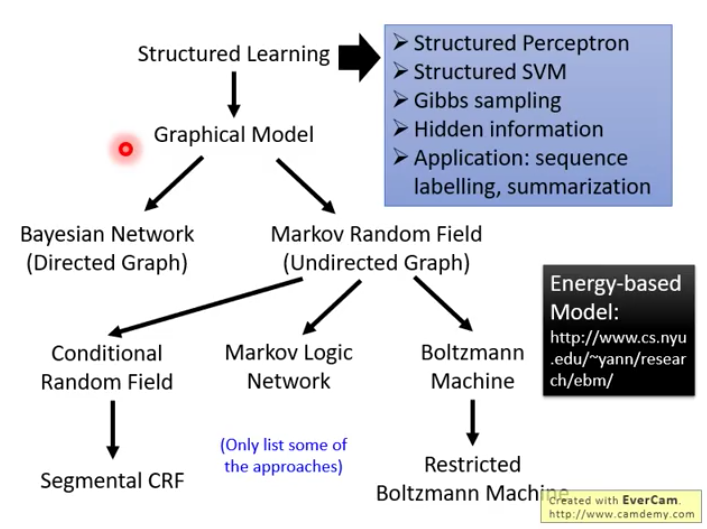

生成器 vs 判别器

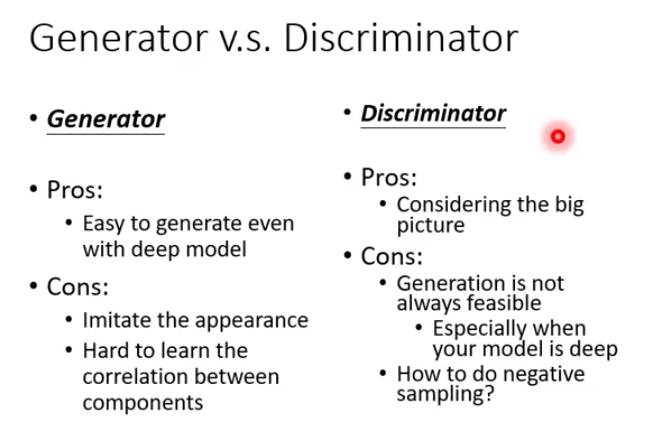

VAE生成的图像比较模糊，GAN是比较好的，而不同的GAN之间也是差不多的性能...

正是因为单独使用生成器和判别器存在的种种不利，所以才考虑将两者结合起来，利用各自的优势，得到最后的GAN的...